# Term Project: Youtube Trending Videos

## Analysis on YouTube Trending Videos  

An analysis on the amount of engagement (likes, dislikes, views, comment count) Youtube Trending videos get and the relationship between each of these datas. 

## Import Libraries

In [76]:
# to load the data file as a Pandas data frame and analyze the data
import pandas as pd

import numpy as np

# Data visualisation libraries
import matplotlib.pyplot as plt  
import seaborn as sns

## Import Data Set

In [77]:
# import data set
videos = pd.read_csv('../data/USvideos.csv')

# head() method to view the first 5 rows to see if data imported correctly
videos.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [78]:
# to get some quick stats of for each category
videos.describe()

category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06

## Data Visualization 

Using a scatter plot to see a clear visual representation of the relationship between the number of likes and the number of views a youtube video recieves. 

### Scatter Plot

Text(0.5, 1.0, 'Views vs Likes')

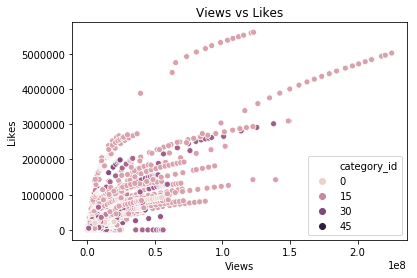

In [79]:
sns.scatterplot(x = videos['views'], 
                y = videos['likes'], 
                hue = videos['category_id'])
# labels for plot
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views vs Likes')

From this plot, we can see the relationship between views to likes for all youtube trending videos in the dataset. It is obvious to see that the more views a video recieves, the more likes it will most likely recieve as well. 

## Data Analytics

In [80]:
# Subset data to only get the numerical categories of the dataframe
videosSubset = videos.iloc[:, 7:11]
videosSubset.head()

views   likes  dislikes  comment_count
0   748374   57527      2966          15954
1  2418783   97185      6146          12703
2  3191434  146033      5339           8181
3   343168   10172       666           2146
4  2095731  132235      1989          17518

### Pair Plot

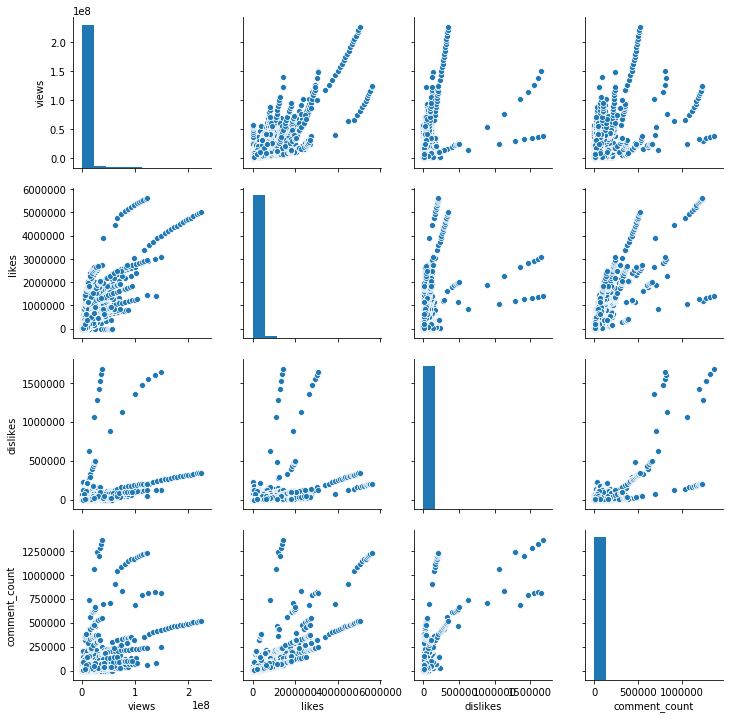

In [81]:
# create pairplot to get the relationships between each of these datas
sns.pairplot(videosSubset) 


From this pairplot, it is shown that there is definetely a relationship between each of these datas. The more views a video recieves, the more comment count, likes, and dislikes it will recieve as well.

### Correlation 

Is there a strong strong correlation between any of these variables?

In [82]:
# see what relationships have a strong correlation with one another
videos.corr()

category_id     views     likes  dislikes  \
category_id                1.000000 -0.168231 -0.173921 -0.033547   
views                     -0.168231  1.000000  0.849177  0.472213   
likes                     -0.173921  0.849177  1.000000  0.447186   
dislikes                  -0.033547  0.472213  0.447186  1.000000   
comment_count             -0.076307  0.617621  0.803057  0.700184   
comments_disabled          0.048949  0.002677 -0.028918 -0.004431   
ratings_disabled          -0.013506  0.015355 -0.020888 -0.008230   
video_error_or_removed    -0.030011 -0.002256 -0.002641 -0.001853   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                 -0.076307           0.048949         -0.013506   
views                        0.617621           0.002677          0.015355   
likes                        0.803057          -0.028918         -0.020888   
dislikes                     0.700184          -0.004431         -0.008230   
comment_count                1.000000          -0.028277         -0.013819   
comments_disabled           -0.028277           1.000000          0.319230   
ratings_disabled            -0.013819           0.319230          1.000000   
video_error_or_removed      -0.003725          -0.002970         -0.001526   

                        video_error_or_removed  
category_id                          -0.030011  
views                                -0.002256  
likes                                -0.002641  
dislikes                             -0.001853  
comment_count                        -0.003725  
comments_disabled                    -0.002970  
ratings_disabled                     -0.001526  
video_error_or_removed                1.000000

There's strong correlation between views, likes, dislikes, and comment count which will, as a result, allow us to make predictions between these variables. 

## Univariate Linear Regression: y = ax + b

Let's assign one of these variables as the independent variable (x) and predict the outcome of dependent variable (y). 

Because there is a strong correlation between views to likes. I will predict the amount of likes a video will get depending on the amount of views it recieves. 

In [83]:
# views (x) to predict likes (y) (strong correlation)
# Independent Variable
x = videos[['views']]

# Dependent Variable
y = videos[['likes']]
x.head()

views
0   748374
1  2418783
2  3191434
3   343168
4  2095731

### Fit the linear regression (build model)

In [84]:
# create linear regression model
from sklearn.linear_model import LinearRegression 
# we are doing to regress (reduce) our errors
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predict Value

In [85]:
# Select # of views to predict # of likes 
views = 300000
testViews = pd.DataFrame({'views': [views]})

# Predict the Final Earning (y)
predictions = lm.predict(testViews)

predictions

array([[20096.25384294]])

If a video were to get 300K views, for example, it is predicted to get about 20K likes. 

In [86]:
# Extract the predicted value and round it to 2 decimal places
# output amount of views and predicted likes 
predictedLikes = round(predictions[0][0], 2)
print('Views: ' + str(views))
print('Predicted Likes: ' + str(predictedLikes))

Views: 300000
Predicted Likes: 20096.25


### Reg Plot

Used to perform a simple linear regression model fit and plot. 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


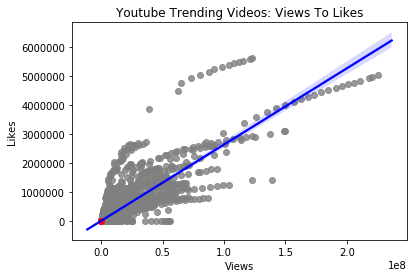

In [87]:
# Plot the all the points in the dataset
# Plot the given and predicted value
plotVideos = sns.regplot(x = 'views',
                        y = 'likes',
                        data = videos,
                        scatter_kws = {'color': 'gray'},
                         line_kws = {'color': 'blue'}) 
plotVideos.set_title('Youtube Trending Videos: Views To Likes')
plotVideos.set(xlabel = 'Views', ylabel = 'Likes')
plotVideos.scatter(views, predictedLikes, color = 'red')
plotVideos

Frpm this reg plot, we are able to visually see where all the number of views and likes from our dataset lie on the graph. We are also able to see our predicted value in comparison to these points, the regression line, and the errors. 

## Sample Data

We are going to sample our data by splitting it into training data and test data. The training set contains a known output (our dataset) and the model learns on this data in order to be generalized to other data later on. We have the test dataset in order to test our model’s prediction on this data. 

In [88]:
# sample the data by splitting the dataset to see how well our model will perform
# import Scikit-Learn library to use the train_test_split method
from sklearn.model_selection import train_test_split
# XTrain       XTest        YTrain      YTest 
openingTrain, openingTest, finalTrain, finalTest = train_test_split(videos[['views']],
                                                                    videos[['likes']],
                                                                    test_size = 0.3, random_state = 1)
len(openingTrain)

28664

Fit the model on the training data: 

In [89]:
# all the predicted values for all the tested videos we gave it 
lm = LinearRegression()
lm.fit(openingTrain, finalTrain)

predictions = lm.predict(openingTest)

predictions

array([[ 43905.64288786],
       [ 30486.74101837],
       [ 16753.52905225],
       ...,
       [440888.42310868],
       [ 23309.87907232],
       [ 28332.79766451]])

As you can see, we’re fitting the model on the training data and trying to predict the test data. These are some of the predictions.  

In [91]:
# evaluate errors to know how good/ bad your model is
from sklearn import metrics
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(finalTest, predictions))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(finalTest, predictions))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(finalTest, predictions)))

Mean Absolute Error (MAE):  41260.989531120416
Mean Squared Error (MSE):  15921843878.991919
Root Mean Squared Error (RMSE):  126181.78901486505


These errors are used to determine how good or bad my model is. I then decided to then do a multivariate linear regression to compare those errors to these errors from a univariate linear regression. 

## Multivariate Linear Regression

Predicts an outcome from multiple values. 
It this case, instead of predicting likes from the amount of views a video will receive, we can instead use multiple independent variables (views, comment count, and dislikes) to predict our independent variable (likes). More data is being analyzed for our independent variables so this should make better and accurate predictions.

In [92]:
# train our model on sample data
from sklearn.model_selection import train_test_split
x = videos[['views', 'comment_count', 'dislikes']].values
y = videos['likes'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [93]:
# fit the model on training data
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [94]:
# compare the real values and predicted values
# the closer the better
# the difference between the actual and predicted values = errors and we want as little errors as possible
# flatten it so we can get out of the list of list
results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
results.head()

Actual     Predicted
0   37595  49255.763587
1    4916  23296.752302
2    5430  11089.091475
3   32457  48131.521632
4   77746  60402.746207

In [95]:
from sklearn import metrics
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE):  30175.377515376706
Mean Squared Error (MSE):  6080977553.453324
Root Mean Squared Error (RMSE):  77980.62293578658


After training my data, I fit it into a linear regression model, and then compared the actual values to the predicted values to see how close to are to one another. Afterwards, I evaluated the errors and I saw that these errors are much smaller than the ones given from the univariate linear regression. The smaller the errors = the better the model is.  

Conclusion: It was possible to predict the amount of likes a video will recieve based on the amount of likes, dislikes, and comment count due to the fact that they all have a strong correlation with one another. After training and testing my data, I was able to compare these actual values to predicted values. I also analyzed the MAE, MSE, and RMSE and concluded that by using a multivariate linear regression, I got smaller errors in comparison to the univaraite linear regression which means I will have a better model using a multivariate linear regression because there is more data being used. 

## Classification Decision Tree

Given the amount of engagement a video recieves (likes, dislikes, views, comment count), let's classify which genre that video could belong to. 

### Import Libraries

In [96]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # import decision tree classifer 
from sklearn.model_selection import train_test_split # import train_test_split function
from sklearn import metrics # import scikit-learn metrics module for accuracy calculation 

### Import Data

In [97]:
videos = pd.read_csv('../data/USvideos.csv')
videos.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  Today we find out if Link is a Nickelback amat...  
4  I know it's been a while since we did this sho...

In [98]:
# subset on a sample of 1000 rows 
videos1K = videos.sample(n = 1000)
videos1K

video_id trending_date  \
10088  tAn7wxn2Atk      18.03.01   
7203   2ktuvx9hrMw      17.20.12   
37315  0zZ0Y_UZRBw      18.27.05   
20828  rQQjjYyZpa4      18.28.02   
21434  jTap34G5TFU      18.03.03   
69     Jw1Y-zhQURU      17.14.11   
15361  XIZmIl9SsXk      18.31.01   
39599  1ZXWwIjQnHs      18.08.06   
20913  Su9Mns6fWV8      18.28.02   
31651  IUsFWiE0d20      18.29.04   
3317   rtJ7JTApIfM      17.30.11   
33600  qD2yyikDcDw      18.09.05   
4959   Z48OG9917mg      17.08.12   
27111  _vrcsnkXCI8      18.31.03   
38000  Yg8jdBLTtfo      18.31.05   
6723   IbmvDn6I6sI      17.17.12   
35795  8XBLuU_4Qgo      18.20.05   
9292   sSszA_Ugd1A      17.30.12   
15108  SJsvPv5Q_oY      18.30.01   
26232  FhwktRDG_aQ      18.27.03   
2298   zOgle88sKro      17.25.11   
6480   37z3bfXu3BA      17.16.12   
36500  WbgIREVg2JU      18.23.05   
25388  FFsp5b4AUTE      18.23.03   
5269   2sxuAm569IY      17.10.12   
12850  4cXsgT3ZcL8      18.19.01   
17097  LUuJl490BL0      18.09.02   
182    7m630xvAJtA      17.14.11   
6660   X9QiHlEC22U      17.17.12   
17440  CNBGEWRdeIM      18.11.02   
...            ...           ...   
18220  0DVNtFA-_wA      18.15.02   
40735  7UoP9ABJXGE      18.13.06   
27537  Z4qNw1dPuNI      18.02.04   
36232  pFc6I0rgmgY      18.22.05   
17762  V7E7huN3CPU      18.12.02   
31753  rEdl2Uetpvo      18.30.04   
9465   doHVMJnuvDA      17.31.12   
32108  LE7QEIy-6NE      18.01.05   
40139  t4pRQ0jn23Q      18.10.06   
24142  dEs6-IfOGbw      18.16.03   
12693  Vk-HI3SDoH0      18.18.01   
26299  XGd1dq1BatM      18.27.03   
4073   TPcV_3D3V2A      17.04.12   
31555  T1-k7VYwsHg      18.29.04   
16468  cDjYY7nW7cY      18.06.02   
35055  86ysRAffCpI      18.16.05   
6869   hiGqKwy4yM0      17.18.12   
13678  FvBcYkY7ZGo      18.23.01   
21967  s8UglxtkAIs      18.06.03   
40420  J2m7EUwnqGg      18.12.06   
18233  m-Tp8-CAxPI      18.15.02   
18307  ccQJq3gGt4o      18.15.02   
8378   C5jcZGcMdaI      17.25.12   
33185  5orrZxSjLQA      18.07.05   
7610   ZB7_1CoKntI      17.22.12   
9029   2NpetP71B1o      17.29.12   
5942   kl39KHS07Xc      17.13.12   
29311  nWzHaRM8jeo      18.17.04   
2419   4sXyLTk0IAQ      17.26.11   
10246  bS_Zr-Hu4Mw      18.04.01   

                                                   title  \
10088  Drop the Mic: Pentatonix vs Bell Biv Devoe - F...   
7203   Disney's The Nutcracker and the Four Realms - ...   
37315      THE GREEN MAKEUP CHALLENGE! | NikkieTutorials   
20828         What Happens to Diesel in Liquid Nitrogen?   
21434                MY FIRST NIGHT FILMING ALONE IN LA!   
69         John Lewis Christmas Ad 2017 - #MozTheMonster   
15361               People Try The New Diet Coke Flavors   
39599                Don't Open The Wrong Mystery Door!!   
20913      If The Walking Dead Theme Had Lyrics (Parody)   
31651              🍒 april favs 🍒 (music, clothes, life)   
3317   Hillary Clinton On Why She’s Not Running For P...   
33600  Try to Watch This Without Laughing or Grinning...   
4959          How to Actually Finish Something, for Once   
27111  I GAVE MY MOM HER FIRST MAKEOVER EVER AND SHE ...   
38000  Try to Watch This Without Laughing or Grinning...   
6723                  Operation Redwing - Kickapoo 35735   
35795  John Cena On His Split From Nikki Bella: ‘I Ha...   
9292                                 Floating Death Star   
15108                                     KITTEN and CAT   
26232  WON'T YOU BE MY NEIGHBOR? - Official Trailer [...   
2298     The German Town That's Literally Breaking Apart   
6480   Portugal. The Man - Cheer Up (from Bright: The...   
36500  PHYSICIANS FORMULA BUTTER PALETTE | REVIEW + DEMO   
25388  Roman Reigns is brutally ambushed by Brock Les...   
5269   A Train Runs Through It: Thailand’s Most Dange...   
12850  Black Girls React to Tarte Shape Tape Foundati...   
17097  Justin Timberlake covers Prince at Super Bowl ...   
182       I'm With Her - See You Around [Official Audio]   
6660             The Last Jedi SPOILE

### Add 'Genre' Column

In [99]:
# get the max of all the category ids
videos1K['category_id'].max()

43

In [100]:
# add columnn for video genre 
videos1K['Genre'] = 'Unknown'
videos1K.head()

video_id trending_date  \
10088  tAn7wxn2Atk      18.03.01   
7203   2ktuvx9hrMw      17.20.12   
37315  0zZ0Y_UZRBw      18.27.05   
20828  rQQjjYyZpa4      18.28.02   
21434  jTap34G5TFU      18.03.03   

                                                   title  \
10088  Drop the Mic: Pentatonix vs Bell Biv Devoe - F...   
7203   Disney's The Nutcracker and the Four Realms - ...   
37315      THE GREEN MAKEUP CHALLENGE! | NikkieTutorials   
20828         What Happens to Diesel in Liquid Nitrogen?   
21434                MY FIRST NIGHT FILMING ALONE IN LA!   

               channel_title  category_id              publish_time  \
10088                    TBS           24  2017-12-27T11:55:39.000Z   
7203   Disney Movie Trailers            1  2017-12-19T13:16:10.000Z   
37315        NikkieTutorials           26  2018-05-10T21:11:15.000Z   
20828     The King of Random           27  2018-02-25T15:00:04.000Z   
21434            Molly Burke           22  2018-02-27T18:30:00.000Z   

                                                    tags    views   likes  \
10088  TBS|"TBS Network"|"Comedy"|"TBS Shows"|"Shows"...   974572   15332   
7203   Disney|"The Nutcracker"|"Mackenzie Foy"|"Morga...   765456   14950   
37315  the green makeup challenge|"green makeup chall...  2657840  152321   
20828  diesel|"fuel"|"gas"|"gasoline"|"liquid nitroge...   574104   11012   
21434  molly burke|"blind"|"vlogging alone"|"filming ...    74483    4081   

       dislikes  comment_count  \
10088      1574           2264   
7203        945           2525   
37315      2096          11913   
20828       609           3946   
21434       148            894   

                                       thumbnail_link  comments_disabled  \
10088  https://i.ytimg.com/vi/tAn7wxn2Atk/default.jpg              False   
7203   https://i.ytimg.com/vi/2ktuvx9hrMw/default.jpg              False   
37315  https://i.ytimg.com/vi/0zZ0Y_UZRBw/default.jpg              False   
20828  https://i.ytimg.com/vi/rQQjjYyZpa4/default.jpg              False   
21434  https://i.ytimg.com/vi/jTap34G5TFU/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
10088             False                   False   
7203              False                   False   
37315             False                   False   
20828             False                   False   
21434             False                   False   

                                             description    Genre  
10088  Watch new episodes of Drop the Mic, Tuesdays a...  Unknown  
7203   All Clara (Mackenzie Foy) wants is a key – a o...  Unknown  
37315  Hello guys, it’s me Hulk Tutorials, hello! HAH...  Unknown  
20828  Today we're finding out what happens when you ...  Unknown  
21434  NEW PO BOX: \nPO Box 1127, 5350 Wilshire Blvd....  Unknown

In [101]:
# get all category IDs
videos1K.groupby('category_id')['channel_title'].nunique()

category_id
1      31
2       9
10    121
15     14
17     34
19      8
20     13
22     59
23     48
24    156
25     29
26     60
27     21
28     33
43      1
Name: channel_title, dtype: int64

In [102]:
# add the genre of the video in the Genre column depending on its cateogry ID
videos1K.loc[videos['category_id'] == 1, 'Genre'] = 'Film and Animation'
videos1K.loc[videos['category_id'] == 2, 'Genre'] = 'Autos and Vehicles'
videos1K.loc[videos['category_id'] == 10, 'Genre'] = 'Music'
videos1K.loc[videos['category_id'] == 15, 'Genre'] = 'Pets and Animals'
videos1K.loc[videos['category_id'] == 17, 'Genre'] = 'Sports'
videos1K.loc[videos['category_id'] == 19, 'Genre'] = 'Travel and Events'
videos1K.loc[videos['category_id'] == 20, 'Genre'] = 'Gaming'
videos1K.loc[videos['category_id'] == 22, 'Genre'] = 'People and Blogs'
videos1K.loc[videos['category_id'] == 23, 'Genre'] = 'Comedy'
videos1K.loc[videos['category_id'] == 24, 'Genre'] = 'Entertainment'
videos1K.loc[videos['category_id'] == 25, 'Genre'] = 'News and Politics'
videos1K.loc[videos['category_id'] == 26, 'Genre'] = 'Howto and Style'
videos1K.loc[videos['category_id'] == 27, 'Genre'] = 'Education'
videos1K.loc[videos['category_id'] == 28, 'Genre'] = 'Science and Tech'
videos1K.loc[videos['category_id'] == 29, 'Genre'] = 'Nonprofits and Activism'
videos1K.loc[videos['category_id'] == 43, 'Genre'] = 'Shows'
videos1K.head()

video_id trending_date  \
10088  tAn7wxn2Atk      18.03.01   
7203   2ktuvx9hrMw      17.20.12   
37315  0zZ0Y_UZRBw      18.27.05   
20828  rQQjjYyZpa4      18.28.02   
21434  jTap34G5TFU      18.03.03   

                                                   title  \
10088  Drop the Mic: Pentatonix vs Bell Biv Devoe - F...   
7203   Disney's The Nutcracker and the Four Realms - ...   
37315      THE GREEN MAKEUP CHALLENGE! | NikkieTutorials   
20828         What Happens to Diesel in Liquid Nitrogen?   
21434                MY FIRST NIGHT FILMING ALONE IN LA!   

               channel_title  category_id              publish_time  \
10088                    TBS           24  2017-12-27T11:55:39.000Z   
7203   Disney Movie Trailers            1  2017-12-19T13:16:10.000Z   
37315        NikkieTutorials           26  2018-05-10T21:11:15.000Z   
20828     The King of Random           27  2018-02-25T15:00:04.000Z   
21434            Molly Burke           22  2018-02-27T18:30:00.000Z   

                                                    tags    views   likes  \
10088  TBS|"TBS Network"|"Comedy"|"TBS Shows"|"Shows"...   974572   15332   
7203   Disney|"The Nutcracker"|"Mackenzie Foy"|"Morga...   765456   14950   
37315  the green makeup challenge|"green makeup chall...  2657840  152321   
20828  diesel|"fuel"|"gas"|"gasoline"|"liquid nitroge...   574104   11012   
21434  molly burke|"blind"|"vlogging alone"|"filming ...    74483    4081   

       dislikes  comment_count  \
10088      1574           2264   
7203        945           2525   
37315      2096          11913   
20828       609           3946   
21434       148            894   

                                       thumbnail_link  comments_disabled  \
10088  https://i.ytimg.com/vi/tAn7wxn2Atk/default.jpg              False   
7203   https://i.ytimg.com/vi/2ktuvx9hrMw/default.jpg              False   
37315  https://i.ytimg.com/vi/0zZ0Y_UZRBw/default.jpg              False   
20828  https://i.ytimg.com/vi/rQQjjYyZpa4/default.jpg              False   
21434  https://i.ytimg.com/vi/jTap34G5TFU/default.jpg              False   

       ratings_disabled  video_error_or_removed  \
10088             False                   False   
7203              False                   False   
37315             False                   False   
20828             False                   False   
21434             False                   False   

                                             description               Genre  
10088  Watch new episodes of Drop the Mic, Tuesdays a...       Entertainment  
7203   All Clara (Mackenzie Foy) wants is a key – a o...  Film and Animation  
37315  Hello guys, it’s me Hulk Tutorials, hello! HAH...     Howto and Style  
20828  Today we're finding out what happens when you ...           Education  
21434  NEW PO BOX: \nPO Box 1127, 5350 Wilshire Blvd....    People and Blogs

### Analyze Data

In [103]:
# Average Likes for every Genres
videos1KLikesMean = pd.DataFrame(videos1K.groupby('Genre')['likes'].mean())
# sort Genre by likes - Ascending by default
videos1KLikesMeanSort = videos1KLikesMean.sort_values('likes', ascending = False)
videos1KLikesMeanSort

likes
Genre                            
Music               216652.111111
Gaming              117120.411765
Film and Animation   82128.490196
Comedy               71975.534884
Sports               70501.720000
Entertainment        68482.289855
Howto and Style      50979.728155
People and Blogs     45253.265060
Science and Tech     32010.120000
Pets and Animals     26555.727273
Education            26457.400000
Shows                20529.000000
Autos and Vehicles   15339.200000
Travel and Events    14993.545455
News and Politics     6307.914894

From this analysis, we can see that Music and Film and Animation are the Genre of videos with the most likes.

In [104]:
# STD for all the likes for all Genres
videos1KLikesSTD = pd.DataFrame(videos1K.groupby('Genre')['likes'].std())
videos1KLikesSTDSort = videos1KLikesSTD.sort_values('likes', ascending = False)
videos1KLikesSTDSort

likes
Genre                            
Music               529217.731540
Entertainment       249599.645031
Sports              193709.997390
Gaming              130372.454753
Film and Animation  123511.648610
Comedy               92195.130958
People and Blogs     65135.753184
Howto and Style      60993.154580
Science and Tech     44334.938460
Education            38139.823757
Pets and Animals     24989.179544
Autos and Vehicles   17466.396536
News and Politics    13994.813690
Travel and Events    13189.670211
Shows                         NaN

In [105]:
# mean for all the views for all Genres
videos1KViews = pd.DataFrame(videos1K.groupby('Genre')['views'].mean())
# sort Genres by views - Ascending by default
videos1KViewsSort = videos1KViews.sort_values('views', ascending = False)
videos1KViewsSort

views
Genre                           
Music               6.312823e+06
Gaming              3.726644e+06
Film and Animation  3.300815e+06
Entertainment       2.443062e+06
Sports              2.219186e+06
Science and Tech    1.617085e+06
Comedy              1.585421e+06
People and Blogs    1.357707e+06
Howto and Style     1.139132e+06
Pets and Animals    1.115407e+06
Shows               1.060662e+06
Travel and Events   8.119484e+05
Education           6.606586e+05
News and Politics   5.211625e+05
Autos and Vehicles  4.707925e+05

From this analysis, we can see that Music and Film and Animation are the Genre of videos with the most views as well. This further proves how the number of views a video recieves strongly correlates with the number of likes it will recieve as well. 

In [106]:
# STD for all the views for all Genres
videos1KViewsSTD = pd.DataFrame(videos1K.groupby('Genre')['views'].std())
videos1KViewsSTDSort = videos1KViewsSTD.sort_values('views', ascending = False)
videos1KViewsSTDSort

views
Genre                           
Music               1.599824e+07
Entertainment       8.277213e+06
Film and Animation  5.689636e+06
Sports              4.494183e+06
Gaming              4.173389e+06
Science and Tech    2.524592e+06
People and Blogs    2.191487e+06
Comedy              1.926767e+06
Pets and Animals    1.481622e+06
Howto and Style     1.374312e+06
News and Politics   8.935859e+05
Travel and Events   7.723782e+05
Education           6.336171e+05
Autos and Vehicles  3.883515e+05
Shows                        NaN

Text(0.5, 1.0, 'Views for each Genre of Youtube Videos')

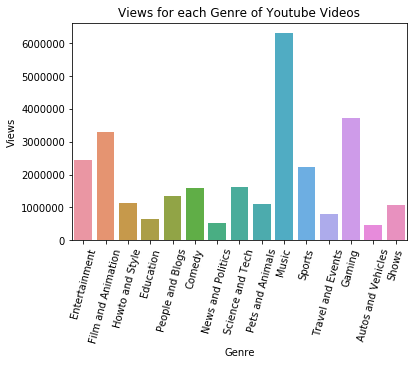

In [107]:
# bar plot to visualually see the average views for every Genre
sns.barplot(x = videos1K['Genre'], 
                y = videos1K['views'],
                ci = None)

plt.xticks(rotation = 75)
plt.xlabel('Genre')
plt.ylabel('Views')
plt.title('Views for each Genre of Youtube Videos')

This bar graph is displayed to visually show the amount of views each genre of videos recieves. As we can see, "Music" and "Film and Animation" have the most views on average like what we saw previously. 

### Select Data for Classification 

In [108]:
# independent variables 
engagement = videos1K[['likes', 'views','dislikes', 'comment_count']].values

# dependent variables
genre = videos1K[['Genre']].values

In [109]:
# 70% training and 30% test
trainEngagement, testEngagement, trainGenre, testGenre = train_test_split(engagement, genre, test_size = 0.3, random_state = 1)

### Build Decision Tree

Given set x (views, likes, dislikes, comment_count), lets predict the genre of that video.

In [110]:
# Create Decision Tree classifier
tree = DecisionTreeClassifier()

# Train our model on training data
model = tree.fit(trainEngagement, trainGenre)

# Predict each phase of the testing data
predictedGenres = model.predict(testEngagement)

In [111]:
# Make a data frame of the actual genre and predicted genre
results = pd.DataFrame({'Actual': testGenre.flatten(), 'Predicted': predictedGenres.flatten()})
results.head()

Actual          Predicted
0             Sports             Sports
1  News and Politics      Entertainment
2      Entertainment             Comedy
3      Entertainment             Gaming
4             Sports  Travel and Events

After training and testing our data, this compares the actual genre to the predicted genre. 

In [112]:
# Model Accuracy
# the larger the accuracy # the better (0-1)
print('Accuracy: ', metrics.accuracy_score(testGenre, predictedGenres))

Accuracy:  0.25333333333333335


Because we are only looking at 1000 rows from the whole dataset, the accuracy will not be as high. 
When I made the same analysis with my whole dataset previously though, I got a 0.5 accuracy precentage. 

### Visualization

In [113]:
# Install a package in Jupyter notebooks
!pip install pydotplus

You should consider upgrading via the 'pip install --upgrade pip' command.


In [114]:
# import libraries
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [115]:
# Prepare labels for tree
predictors = ['Views', 'Likes', 'Dislikes', 'Comment Count']
classes = ['Film and Animation', 'Autos and Vehicles', 'Music', 'Pets and Animals', 'Sports', 'Travel and Events', 'Gaming', 'People and Blogs', 'Comedy', 'Entertainment', 'News and Politics', 'Howto and Style', 'Education', 'Science and Tech', 'Nonprofits and Activism']

# Generate the graphics 
dot_data = StringIO()
export_graphviz(model, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True,
               feature_names = predictors, 
               class_names = videos1K.Genre.unique())

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write the file to file
graph.write_png('Youtube_Trending_Videos_Decision_Tree.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.652729 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.652729 to fit



Becase this graph is very large and unreadable, I decided to subset and pull out 4 Genres from my dataset and make a decision tree from that subset. This is just so we can output a graph that is more readable. 

### Decision Tree Subset

In [116]:
# in the dataset, pull out 4 genres
videosSubsetComedy = videos1K[(videos1K['Genre'] == 'Comedy')]
videosSubsetEntern = videos1K[(videos1K['Genre'] == 'Entertainment')]
videosSubsetPets =  videos1K[(videos1K['Genre'] == 'Pets and Animals')]
videosSubsetMusic = videos1K[(videos1K['Genre'] == 'Music')]

In [117]:
# add all the data for those 4 Genres into one Data Set
videosGenreSubset = pd.concat([videosSubsetComedy, videosSubsetEntern, videosSubsetPets, videosSubsetMusic], ignore_index = True, sort = False)
videosGenreSubset

video_id trending_date  \
0    1ZXWwIjQnHs      18.08.06   
1    Su9Mns6fWV8      18.28.02   
2    Z48OG9917mg      17.08.12   
3    5qjU_wPyv4E      18.13.01   
4    4k9bXpi1tU4      18.06.05   
5    yWjRvhfjpI8      18.01.04   
6    TU-Z4uPnFeg      17.24.12   
7    lJkXbzQPIkM      17.14.12   
8    eep4_0JaaG8      17.06.12   
9    N1ikySurAP0      18.21.02   
10   XtlLI_pBC3s      18.21.01   
11   puREqwXzyCI      17.23.11   
12   x_joMJBrT34      18.24.05   
13   UNnHy6Qc5-c      18.21.01   
14   qtW9ornyPIQ      18.14.04   
15   C6Oo9Hel6MI      18.19.01   
16   irHqI9fUc4I      18.03.06   
17   sQzbRulqz3s      18.12.01   
18        #NAME?      18.19.05   
19   3iUfzN4RAB8      18.02.04   
20   qtW9ornyPIQ      18.31.03   
21   IoqDYnn7VKA      17.31.12   
22   expKmfdoo28      18.02.03   
23   XaKDp3ijSx0      18.03.05   
24   seplheZ6d7M      18.16.01   
25   N1ikySurAP0      18.16.02   
26   ZpS-w6BxN-U      17.18.11   
27   SKV6h_5XFbk      18.25.05   
28   jCb-WcxO5SU      18.19.02   
29   FkiQ67FtycI      18.14.04   
..           ...           ...   
507  RHUxyXZBXY8      17.28.12   
508  cMD63TwzB1o      17.30.12   
509  zZ9FciUx6gs      17.19.11   
510  B3qT1k0r9pw      18.09.05   
511  oQxKEtoHygY      17.20.12   
512  i0p1bmr0EmE      18.25.04   
513  MKLlDnUqho4      17.19.11   
514  J_CFBjAyPWE      18.01.02   
515  BFkTu8Y1KLs      18.12.05   
516  oWw1BcFhk-k      18.26.05   
517  t7Fa1GUf-LE      17.15.12   
518  uKkbfxTHJGI      18.21.03   
519  n_W54baizX8      18.02.06   
520  ycy30LIbq4w      18.26.03   
521  V1Pl8CzNzCw      18.04.05   
522  ffxKSjUwKdU      18.14.05   
523  gA-NDZb29I4      18.07.01   
524  bMrRN99DYKU      17.06.12   
525  sS0LCjOiIhc      18.23.03   
526  ufynqs_COF4      18.14.05   
527  m1-rpd3S-48      18.06.04   
528  7J4nN0Te9m8      18.05.03   
529  37z3bfXu3BA      17.20.12   
530  0xCggNCs2kU      17.03.12   
531  BQ31l1gPGKM      18.27.02   
532  7UoP9ABJXGE      18.13.06   
533  XGd1dq1BatM      18.27.03   
534  hiGqKwy4yM0      17.18.12   
535  ccQJq3gGt4o      18.15.02   
536  5orrZxSjLQA      18.07.05   

                                                 title  \
0                  Don't Open The Wrong Mystery Door!!   
1        If The Walking Dead Theme Had Lyrics (Parody)   
2           How to Actually Finish Something, for Once   
3          Remembering Someone by Their Facebook Posts   
4                                    Parked In My Spot   
5         Talking Kitty Cat - World's Most Spoiled Cat   
6             The Funeral - Cyanide & Happiness Shorts   
7        WHAT'S THE BEST HOLIDAY GIFT?/ GABY & ALLISON   
8        Why English is the MOST CONFUSING Language!!?   
9    Parks and Recreation - What's Galentine's Day?...   
10                                  My Dogs Meet A Cat   
11           I'M GOING TO BROADWAY! (Dear Evan Hansen)   
12        10 of the World's Smallest Working Products!   
13                       MY NEW CAREER. A NEW EPISODE!   
14                Who is Who Challenge - Merrell Twins   
15                                   How I Make Videos   
16   France's Migrant Hero - Between the Scenes | T...   
17                    Mitchell Robbins Microwaves Soup   
18                                   We Bought A House   
19     Every Pixar Movie Reviewed in 10 Words or Less!   
20                Who is Who Challenge - Merrell Twins   
21   Original Bellas rehearsal video from Pitch Per...   
22   Chadwick Boseman Surprises Black Panther Fans ...   
23                             What is the BEST Fruit?   
24         Dogs and Christmas Tree Tug of War - 981575   
25   Parks and Recreation - What's Galentine's Day?...   
26         Search Party with Tim McGraw and Faith Hill   
27                   ROYAL WEDDING — A Bad Lip Reading   
28   If Commercials were Real Life - Daytona 500/Ap...   
29                    Unboxing and wearing the fursuit   
..                                                 ...   
507                           Migos - Stir 

### Select Data for Classification 

In [118]:
# independent variables 
engagement = videosGenreSubset[['likes', 'views','dislikes', 'comment_count']].values

# dependent variables
genre = videosGenreSubset[['Genre']].values

In [119]:
# 70% training and 30% test
trainEngagement, testEngagement, trainGenre, testGenre = train_test_split(engagement, genre, test_size = 0.3, random_state = 1)

In [120]:
# Create Decision Tree classifier
tree = DecisionTreeClassifier()

# Train our model on training data
model = tree.fit(trainEngagement, trainGenre)

# Predict each phase of the testing data
predictedGenres = model.predict(testEngagement)

In [121]:
# Make a data frame of the actual phases and actual phases
results = pd.DataFrame({'Actual': testGenre.flatten(), 'Predicted': predictedGenres.flatten()})
results.head()

Actual Predicted
0            Comedy     Music
1  Pets and Animals     Music
2     Entertainment     Music
3     Entertainment     Music
4             Music     Music

In [122]:
# Model Accuracy
# the larger the accuracy # the better (0-1)
print('Accuracy: ', metrics.accuracy_score(testGenre, predictedGenres))

Accuracy:  0.4506172839506173


In [123]:
# Prepare labels for tree
predictors = ['Views', 'Likes', 'Dislikes', 'Comment Count']
classes = ['Comedy', 'Music', 'Enterntainment', 'Pets and Animals']
# Generate the graphics 
dot_data = StringIO()
export_graphviz(model, out_file = dot_data,
               filled = True, rounded = True,
               special_characters = True,
               feature_names = predictors, 
               class_names = videosGenreSubset.Genre.unique())

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Write the file to file
graph.write_png('Youtube_Trending_Videos_Decision_Tree_Subset.png')
Image(graph.create_png())

Conclusion: From this decision tree, you can see how I was able to successfully classify the genre of each video based on the amount of engagement (likes, dislikes, views, comment count) it recieves.